In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("/Users/meenakshirana/Desktop/new take off folder/data science study udemy/S38_L256/3.01. Country clusters.csv")

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


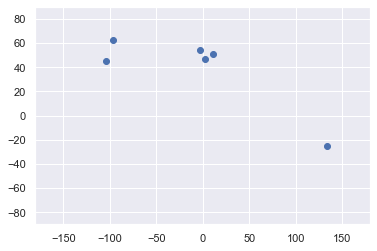

In [4]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [5]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [6]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
identified_cluster = kmeans.fit_predict(x)
identified_cluster

array([1, 1, 1, 1, 1, 0], dtype=int32)

In [8]:
data_with_cluster = data.copy()
data_with_cluster['Cluster'] = identified_cluster
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


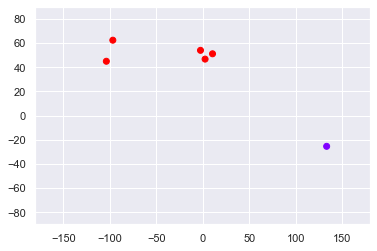

In [9]:
plt.scatter(data_with_cluster['Longitude'],data_with_cluster['Latitude'],c = data_with_cluster['Cluster'],cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### for 3 clusters

In [10]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
identified_cluster = kmeans.fit_predict(x)
identified_cluster

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [12]:
data_with_cluster = data.copy()
data_with_cluster['Cluster'] = identified_cluster
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


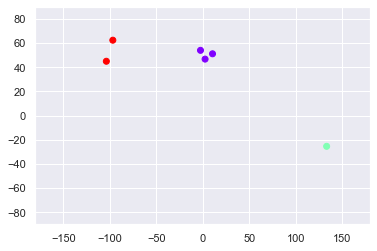

In [13]:
plt.scatter(data_with_cluster['Longitude'],data_with_cluster['Latitude'],c = data_with_cluster['Cluster'],cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [14]:
kmeans.inertia_

288.1052333333333

In [19]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss    

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

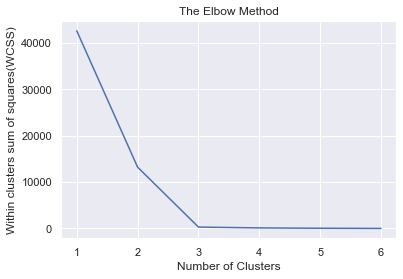

In [20]:
cluster_number = range(1,7)
plt.plot(cluster_number,wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within clusters sum of squares(WCSS)")
plt.show()